# Fluctuations of the first row of diagram and Tracy-Widom distribution
First load usual modules and use usual sampling with dual RSK from Sage.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')

def sample (n, k):
    M = matrix ([[0 if random () <= 1/2 else 1 for j in range(1, k+1)] for i in range(1, n+1)])
    P, Q = RSK(M, insertion = RSK.rules.dualRSK)
    return list(P.shape())

We can sample a diagram and plot it as usual

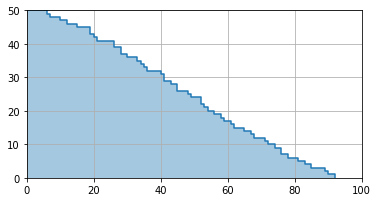

In [2]:
n=50
k=100

rows=sample(n,k)

# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
ax1.set_xlim(( 0, k))            
ax1.set_ylim((0, n))

ax1.set_aspect('equal','box')
plt.grid()
diagdata=([x for x in rows for _ in range(2)]+[0],
[0]+[y for y in range(1,len(rows)+1) for _ in range(2)])
plt.plot(*diagdata)
plt.fill_between(*diagdata,alpha=0.4)
plt.show()       

In [3]:
n,k

(50, 100)

But sampling a lot of diagrams takes time, because RSK implementation in Python is not fast it does not utilize multiple CPU cores. Nevertheless, we can see the shape of the distribution.

CPU times: user 14 s, sys: 23.8 ms, total: 14 s
Wall time: 14.1 s


(array([  8.,  20.,  56.,  95., 133.,  96.,  50.,  30.,  11.,   1.]),
 array([89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <BarContainer object of 10 artists>)

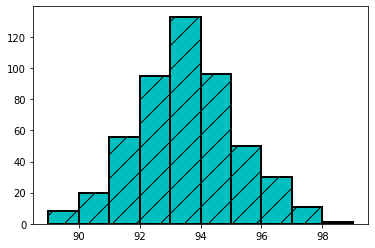

In [4]:
%%time
firstrowlengths=[sample(n,k)[0] for _ in range(500)]
binwidth=1
plt.hist(firstrowlengths,bins=np.arange(min(firstrowlengths), max(firstrowlengths) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

We can use C code for RSK, to do so we use special adapter code in file `dual_rsk_sage.pyx`, it exports two functions, one `dual_rsk_with_weights` takes two lists `xs` and `ys` of Schur polynomial parameters and a seed for a random number generator and produces a diagram. Another one `dual_rsk` takes 0-1 matrix and produces a diagram. 

In [5]:
%runfile dual_rsk_sage.pyx

Compiling ./dual_rsk_sage.pyx...


In [6]:
%%time
import numpy as np
rng=np.random.default_rng()

n=200
k=300
a=2
b=3
xs=a*np.ones(n)
ys=b*np.ones(k)

diagram1=[len(x) for x in dual_rsk_with_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[1] if len(x)>0]
print(diagram1)

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 298, 297, 297, 296, 296, 296, 296, 295, 294, 294, 294, 294, 293, 292, 292, 291, 291, 291, 291, 291, 290, 289, 287, 287, 286, 285, 285, 285, 284, 283, 283, 283, 282, 281, 281, 281, 280, 279, 278, 278, 277, 276, 276, 275, 274, 274, 274, 272, 272, 271, 271, 270, 269, 268, 268, 266, 266, 265, 265, 263, 263, 261, 261, 260, 259, 258, 257, 256, 253, 253, 253, 252, 250, 250, 248, 248, 247, 245, 243, 243, 242, 241, 241, 240, 239, 238, 237, 235, 235, 233, 232, 230, 229, 227, 226, 225, 225, 222, 221, 217, 217, 217, 215, 212, 211, 210, 210, 206, 206, 204, 203, 201, 200, 199, 196, 195, 193, 191, 191, 189, 184, 184, 182, 181, 180, 176, 175, 171, 170, 167, 165, 163, 161, 158, 154, 154, 148, 147, 146, 140, 136, 133, 131, 118]

In [7]:
%%time
ab=np.outer(xs,ys)
zeroonematrix=np.array(rng.uniform(size=ab.shape)>ab/(1+ab),dtype='int8')

diagram2=[len(x) for x in dual_rsk(zeroonematrix)[1] if len(x)>0]
print(diagram2)

[174, 171, 167, 161, 155, 153, 152, 148, 144, 139, 139, 137, 135, 132, 130, 129, 127, 125, 122, 121, 119, 117, 114, 113, 113, 108, 108, 103, 103, 103, 102, 98, 96, 96, 92, 92, 88, 88, 86, 86, 84, 83, 83, 81, 79, 79, 78, 75, 73, 72, 72, 70, 68, 67, 65, 64, 63, 63, 61, 60, 60, 57, 56, 56, 55, 55, 53, 52, 51, 51, 50, 48, 47, 46, 46, 44, 43, 42, 41, 40, 40, 39, 37, 37, 37, 36, 35, 34, 32, 32, 32, 30, 30, 29, 29, 28, 27, 26, 25, 25, 24, 24, 24, 23, 22, 21, 21, 21, 20, 20, 18, 18, 18, 17, 16, 15, 15, 14, 14, 14, 13, 12, 12, 11, 11, 10, 10, 9, 9, 9, 9, 7, 7, 7, 6, 6, 6, 6, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
CPU times: user 19.6 ms, sys: 3.85 ms, total: 23.5 ms
Wall time: 22 ms


We see that both functions are efficient. We use the code below to draw multiple diagrams at once.

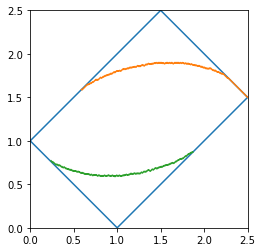

In [8]:
import matplotlib.pyplot as plt
def plot_multiple_diagrams(n,k,*diagrams):
    c=k/n
    plt.axes().set_aspect('equal','box')
    plt.ylim([0,c+1])
    plt.xlim([0,1+c])
    plt.plot([0,1,1+c,c,0],[1,0,c,1+c,1])
    for diagram in diagrams:
        plt.plot([(x+n-i-dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)],
                 [(x+i+dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)])


plot_multiple_diagrams(n,k,diagram1,diagram2)

To sample efficiently, we use `multiprocessing` module to create a pool of subprocesses that will be distributed among CPU cores. One way to sample many diagrams is to generate many random seeds at once and use `dual_rsk_with_weights` in multiprocessing setting.

CPU times: user 107 ms, sys: 64 ms, total: 171 ms
Wall time: 3.94 s


(array([  1.,   2.,  18.,  43., 124., 181., 213., 203., 116.,  58.,  31.,
         10.]),
 array([165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]),
 <BarContainer object of 12 artists>)

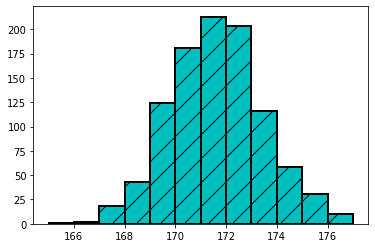

In [24]:
%%time
import subprocess

from multiprocessing import Pool
n=100
k=180
a=1
b=1
niter=1000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

In [20]:
len([v for v in rawstat2g if v<200])

492

In [52]:
len(dual_rsk_with_weights(xs,ys,seeds[i])[1][0])

92

Another way is to generate random matrices using `numpy.random` and apply `dual_rsk` to them in multiprocessing setting. The performance in almost the same, sampling of 5000 diagrams of size $50\times 100$ takes about 5 seconds.

CPU times: user 381 ms, sys: 197 ms, total: 577 ms
Wall time: 5.02 s


(array([1.000e+00, 9.000e+00, 7.400e+01, 2.680e+02, 5.630e+02, 1.040e+03,
        1.157e+03, 9.420e+02, 5.950e+02, 2.570e+02, 7.800e+01, 1.300e+01,
        2.000e+00, 1.000e+00]),
 array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101]),
 <BarContainer object of 14 artists>)

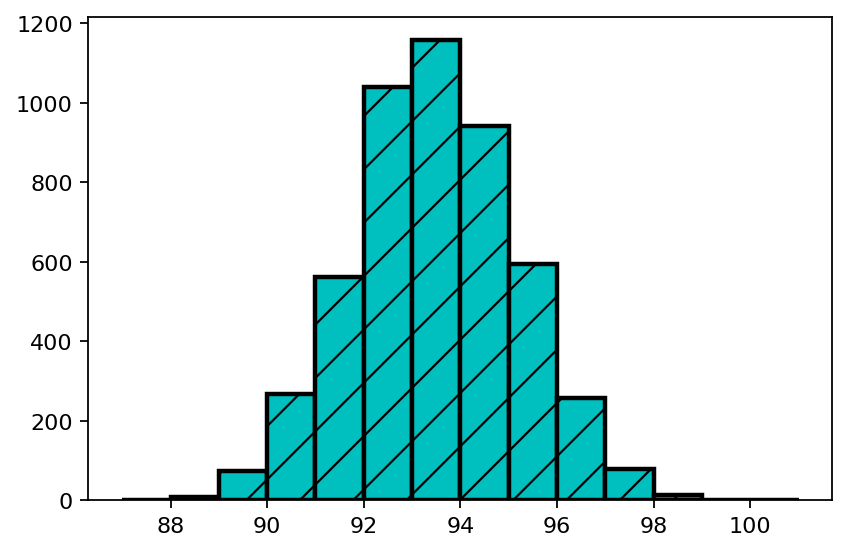

In [125]:
%%time
n=50
k=100
a=1
b=1

niter=5000
xs=a*np.ones(n)
ys=b*np.ones(k)

from numpy.random import SeedSequence, default_rng

ss = SeedSequence()
child_seeds = ss.spawn(niter)
streams = [default_rng(s) for s in child_seeds]

ab=np.outer(xs,ys)

def f(i):
    c=np.array(streams[i].uniform(size=ab.shape)>ab/(1+ab),dtype='int8')
    return len(dual_rsk(c)[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)


We can estimate the asymptotic performance of dual RSK as the product of the number of boxes to be inserted $\sim n^2$ and the insertion time $\sim n^2$, so in total about $O(n^4)$. Therefore sampling of the diagrams 10 times larger is 10000 times slower. Because of that we have to reduce number of samples to 500 and still need to wait more than 20 minutes.

CPU times: user 272 ms, sys: 129 ms, total: 401 ms
Wall time: 22min 33s


(array([ 1.,  5.,  5., 18., 33., 34., 54., 61., 56., 44., 59., 38., 36.,
        24., 16.,  2.,  7.,  6.,  1.]),
 array([943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955,
        956, 957, 958, 959, 960, 961, 962]),
 <BarContainer object of 19 artists>)

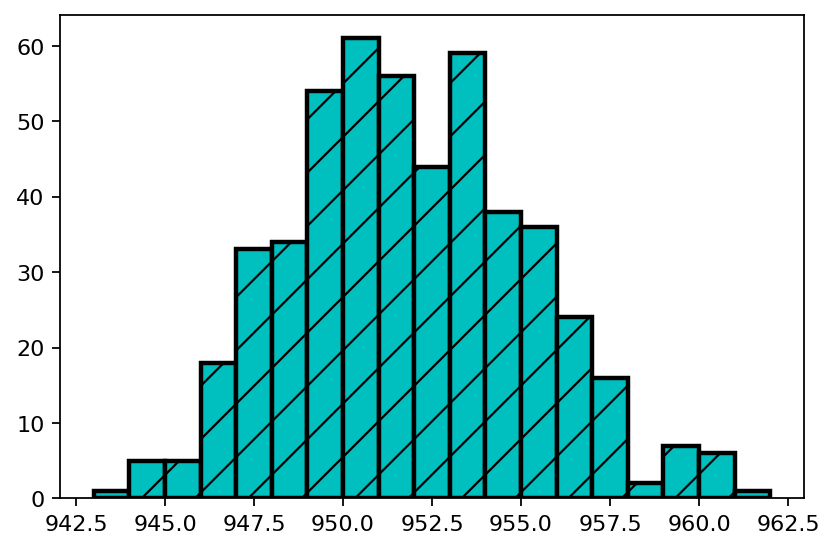

In [54]:
%%time
n=500
k=1000
a=1
b=1

niter=500
xs=a*np.ones(n)
ys=b*np.ones(k)

from numpy.random import SeedSequence, default_rng

ss = SeedSequence()
child_seeds = ss.spawn(niter)
streams = [default_rng(s) for s in child_seeds]

ab=np.outer(xs,ys)

def f(i):
    c=np.array(streams[i].uniform(size=ab.shape)>ab/(1+ab),dtype='int8')
    return len(dual_rsk(c)[1][0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)


We can see that width of distribution scales with $n$ as $n^{1/3}$, as we can compare numeric values of $50^{1/3}$ and $500^{1/3}$.

In [56]:
50.0**(1/3)

3.68403149864039

In [57]:
500.0**(1/3)

7.93700525984100

Now we can compute $u_{+}$ and normalization constant $\sigma$.

In [126]:
n,k

(50, 100)

In [127]:
c=k/n
sigma=(2*c**(1/6)/(c-1)**(2/3)).n()
uplus=(c-1)/2+np.sqrt(c)

We need to scale `binwidth` of the histogram accordingly.

(array([1.000e+00, 9.000e+00, 3.420e+02, 5.630e+02, 1.040e+03, 1.157e+03,
        9.420e+02, 5.950e+02, 2.570e+02, 7.800e+01, 1.300e+01, 2.000e+00,
        1.000e+00]),
 array([-5.3079924 , -4.69862625, -4.0892601 , -3.47989395, -2.8705278 ,
        -2.26116164, -1.65179549, -1.04242934, -0.43306319,  0.17630296,
         0.78566911,  1.39503526,  2.00440142,  2.61376757]),
 <BarContainer object of 13 artists>)

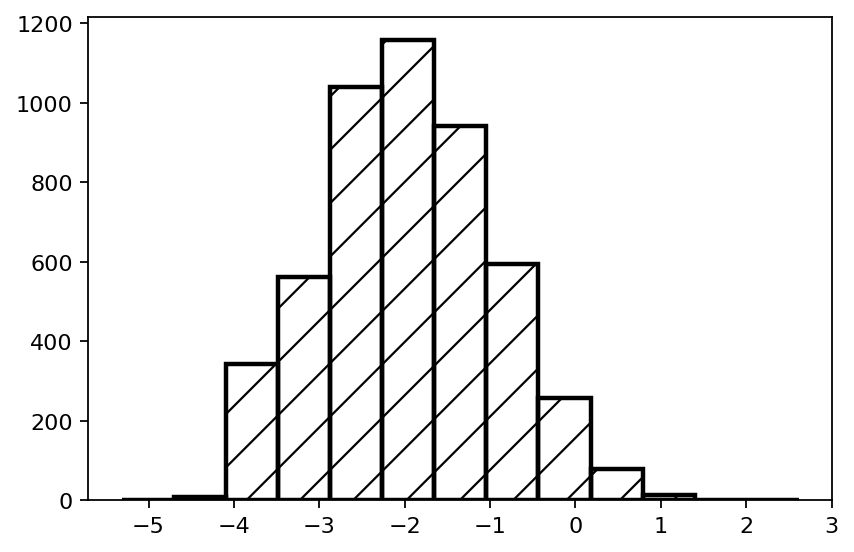

In [128]:
binwidth=1/n.n()**(1/3)*sigma
stat2=(np.array(rawstat2g)-uplus*n)/n.n()**(1/3)*sigma
plt.hist(stat2,bins=np.arange(min(stat2), max(stat2) + binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=False)

Let us compare to Tracy-Widom distribution $TW_2$, for that we use `TracyWidom` package from [https://github.com/yymao/TracyWidom](https://github.com/yymao/TracyWidom), which can be installed by `pip install TracyWidom`.

In [129]:
%pip install TracyWidom

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


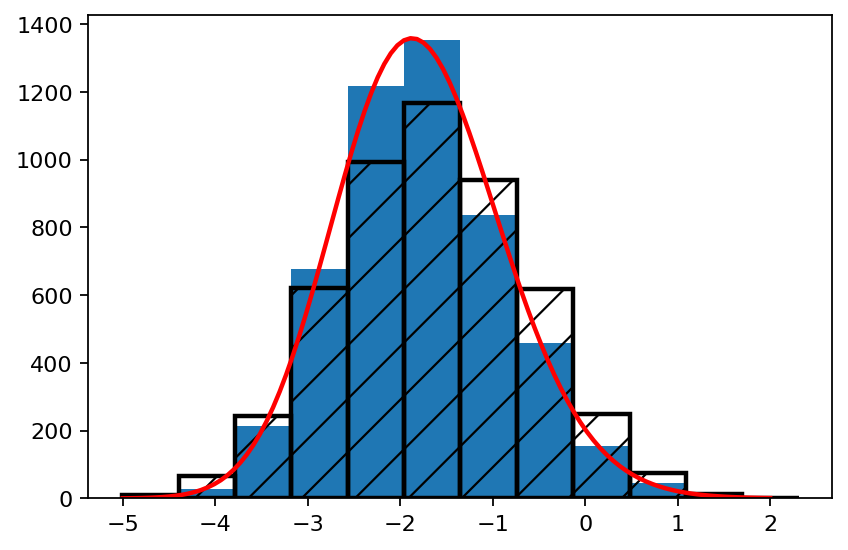

In [112]:
from TracyWidom import TracyWidom
tw2 = TracyWidom(beta=2)
r = np.random.rand(5000)
tw_sample = tw2.cdfinv(r)
plt.hist(tw_sample, bins=np.arange(min(tw_sample), max(tw_sample) + binwidth, binwidth))
plt.hist(stat2,bins=np.arange(min(tw_sample), max(tw_sample) + binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=False)
xs=np.linspace(-5,2,100)
plt.plot(xs,tw2.pdf(xs)*5000*binwidth,color='r',linewidth=2)

We see good agreement between our histogram and Tracy-Widom distribution. 